In [ ]:
!pip install pycaret
!pip install jinja2
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 43.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

In [ ]:
xl_file = pd.ExcelFile('2020Q1Q2Q3Q4-2021Q1.xlsx')

stock_df = {sheet_name: xl_file.parse(sheet_name,parse_dates=True).iloc[:-1,:].iloc[::-1] 
          for sheet_name in xl_file.sheet_names}

In [ ]:
xl_file.sheet_names

['Russia - Sberbank Rossii PAO (S',
 'Turkey - Koc Holding AS (KCHOL)',
 'Egypt - Medinet Nasr Housing (M',
 'Brazil - Minerva SABrazil (BEEF',
 'Argentina - Pampa Energia SA (P',
 'Colombia - Cementos Argos SA (C',
 'South Africa - Impala Platinum ',
 'South Korea - Dongkuk Steel Mil']

In [ ]:
a = xl_file.parse(xl_file.sheet_names[0]).iloc[:-1,:].iloc[::-1]
a.tail(5)

,Date,Price,Open,High,Low,Vol.,Change %
4,2021-03-25 00:00:00,286.66,286.5,287.03,283.85,35.22M,0.0030
3,2021-03-26 00:00:00,291.22,288.63,292.75,288.32,56.07M,0.0159
2,2021-03-29 00:00:00,293.3,289.72,294.09,289.26,43.68M,0.0071
1,2021-03-30 00:00:00,293.25,294.86,295.72,291.5,38.81M,-0.0002
0,2021-03-31 00:00:00,291.02,294.0,294.42,290.26,47.00M,-0.0076


Show data for the stocks

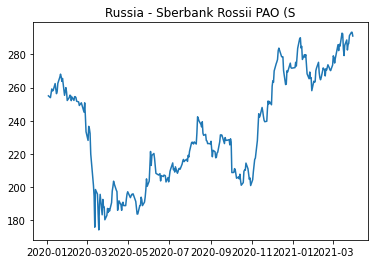

Number of trading day: 311


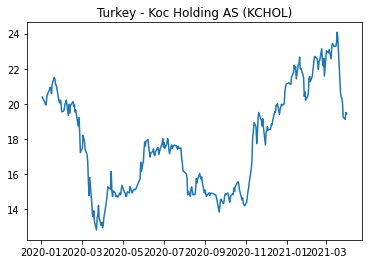

Number of trading day: 315


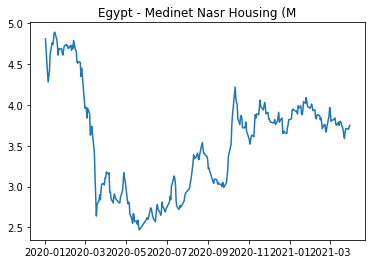

Number of trading day: 305


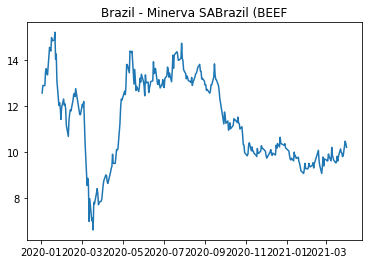

Number of trading day: 309


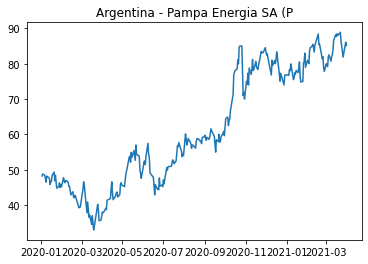

Number of trading day: 300


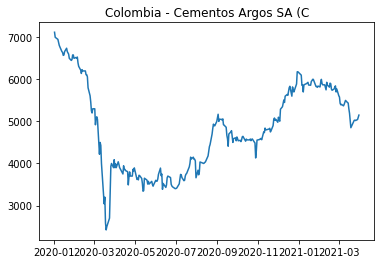

Number of trading day: 303


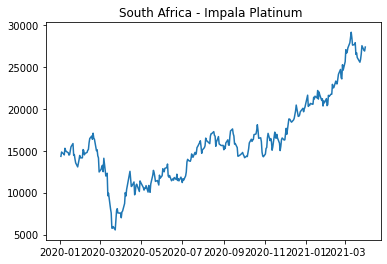

Number of trading day: 314


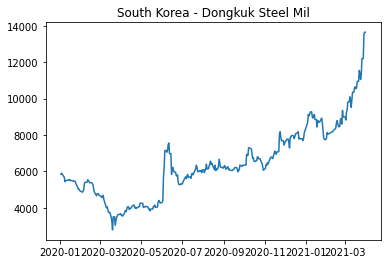

Number of trading day: 341


In [ ]:
stock_price = {}
for stock in stock_df.keys():
    
    
    stock_price[stock] = stock_df[stock][['Date','Price']]
    stock_price[stock].set_index('Date', inplace=True)
    stock_price[stock].astype(float)
    stock_price[stock].to_period("D")
    plt.plot(stock_df[stock]['Date'],stock_df[stock]['Price'])

    plt.title(stock)
    plt.show()
    print('Number of trading day:', len(stock_df[stock]['Date']))



In [ ]:
from pmdarima.model_selection import train_test_split


from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#ARIMA

Let's try ARIMA model. Firstly, we need to test whether the time series are stationary. We use Dickey-Fullar test to get the result.

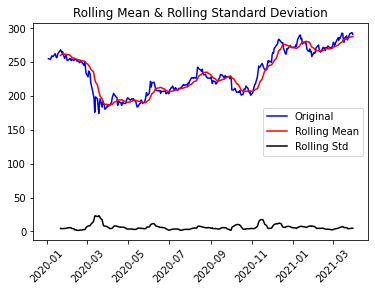

ADF Statistic: -0.986359932078913
p-value: 0.7582066363876816
Critical Values:
	1%: -3.4521902441030963
	5%: -2.871158406898617
	10%: -2.5718948388228586


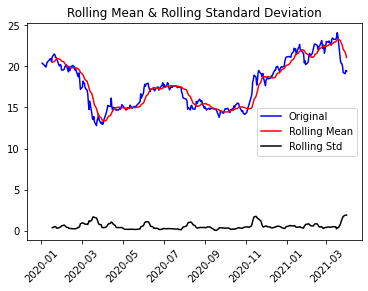

ADF Statistic: -1.4079062414294332
p-value: 0.5784799525388539
Critical Values:
	1%: -3.4513486122290717
	5%: -2.870789013306053
	10%: -2.5716978530569192


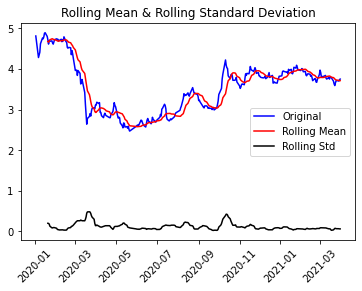

ADF Statistic: -1.7007005487251337
p-value: 0.4307515692821572
Critical Values:
	1%: -3.4521175397304784
	5%: -2.8711265007266666
	10%: -2.571877823851692


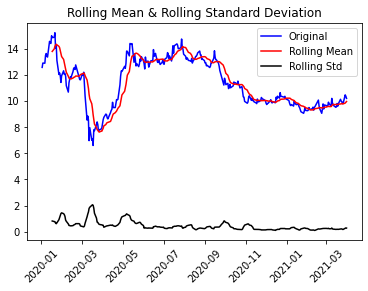

ADF Statistic: -2.2638083112893304
p-value: 0.18390623701557424
Critical Values:
	1%: -3.451973573620699
	5%: -2.8710633193086648
	10%: -2.5718441306100512


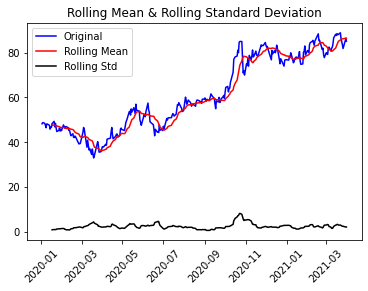

ADF Statistic: -0.7413478173434286
p-value: 0.8357469289607862
Critical Values:
	1%: -3.4524113009049935
	5%: -2.8712554127251764
	10%: -2.571946570731871


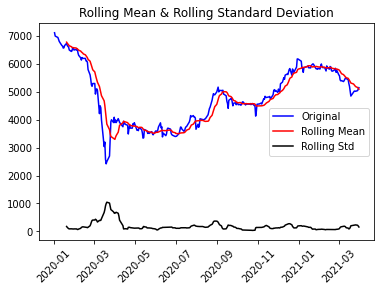

ADF Statistic: -2.1232139415737246
p-value: 0.23528318144575583
Critical Values:
	1%: -3.4525611751768914
	5%: -2.87132117782556
	10%: -2.5719816428028888


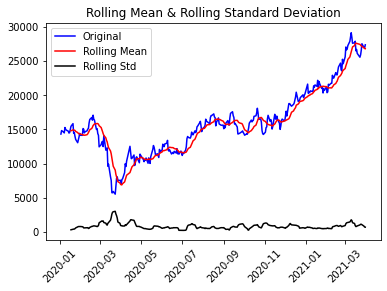

ADF Statistic: 0.1714956326060166
p-value: 0.970616784417502
Critical Values:
	1%: -3.4518314994261337
	5%: -2.8710009653519166
	10%: -2.571810878948318


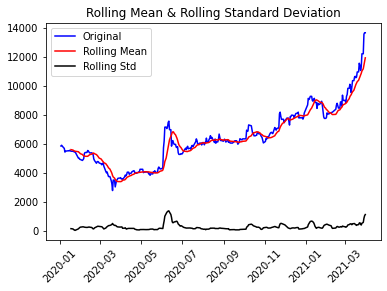

ADF Statistic: 1.8494751172550803
p-value: 0.9984422562038119
Critical Values:
	1%: -3.4497304638968043
	5%: -2.8700785273763487
	10%: -2.571319005190311


In [ ]:
for stock in stock_price.keys():
    rolling_mean = stock_price[stock]['Price'].rolling(window = 12).mean()
    rolling_std = stock_price[stock]['Price'].rolling(window = 12).std()
  
    plt.plot(stock_price[stock]['Price'], color = 'blue', label = 'Original')
    plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rolling_std, color = 'black', label = 'Rolling Std')

    plt.legend(loc = 'best')
    plt.xticks(rotation = 45)
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.show()
    dickey_fuller = adfuller(stock_price[stock]['Price'])
    print('ADF Statistic: {}'.format(dickey_fuller[0]))
    print('p-value: {}'.format(dickey_fuller[1]))
    print('Critical Values:')
    for key, value in dickey_fuller[4].items():
        print('\t{}: {}'.format(key, value))
    

As we see in the test results above, all time series are not stationary since the p-values are so large. Therefore, we need to transform the data

Stock: Russia - Sberbank Rossii PAO (S


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


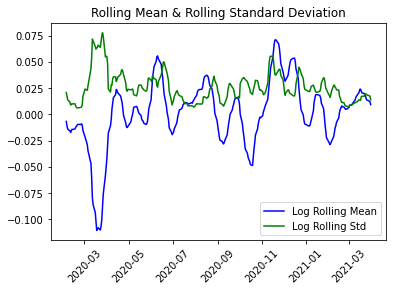

ADF Statistic: -3.539866544499849
p-value: 0.0070203581498441345
Critical Values:
	1%: -3.4531816058796143
	5%: -2.871593390724642
	10%: -2.5721268156511536
The time series is stationary
Stock: Turkey - Koc Holding AS (KCHOL)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


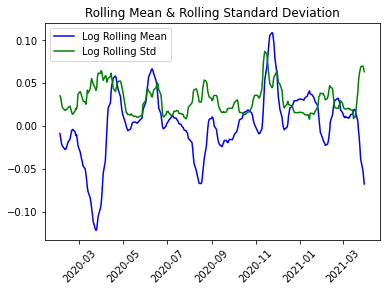

ADF Statistic: -4.953367618052088
p-value: 2.7425722572313492e-05
Critical Values:
	1%: -3.4524113009049935
	5%: -2.8712554127251764
	10%: -2.571946570731871
The time series is stationary
Stock: Egypt - Medinet Nasr Housing (M


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


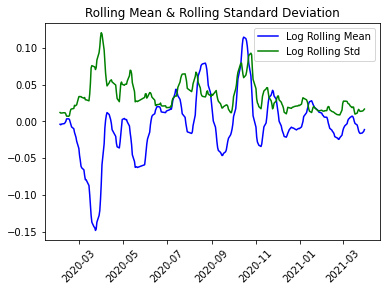

ADF Statistic: -4.645263240600236
p-value: 0.00010650434394301844
Critical Values:
	1%: -3.4534232986669546
	5%: -2.8716994185534745
	10%: -2.5721833625116144
The time series is stationary
Stock: Brazil - Minerva SABrazil (BEEF


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


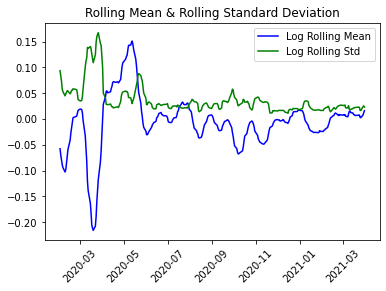

ADF Statistic: -5.102308467252931
p-value: 1.3869928089804289e-05
Critical Values:
	1%: -3.453102162983312
	5%: -2.871558538275452
	10%: -2.5721082282996433
The time series is stationary
Stock: Argentina - Pampa Energia SA (P


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


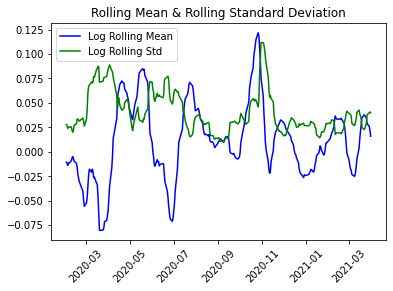

ADF Statistic: -5.377914044997785
p-value: 3.7684225384741043e-06
Critical Values:
	1%: -3.453261605529366
	5%: -2.87162848654246
	10%: -2.5721455328896603
The time series is stationary
Stock: Colombia - Cementos Argos SA (C


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


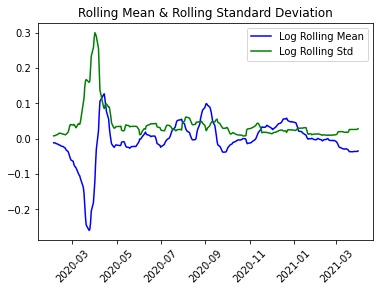

ADF Statistic: -5.131184993399648
p-value: 1.2129950663651851e-05
Critical Values:
	1%: -3.4534232986669546
	5%: -2.8716994185534745
	10%: -2.5721833625116144
The time series is stationary
Stock: South Africa - Impala Platinum 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


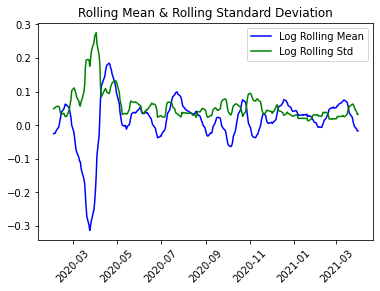

ADF Statistic: -5.0500769495909195
p-value: 1.7648612252027625e-05
Critical Values:
	1%: -3.4531816058796143
	5%: -2.871593390724642
	10%: -2.5721268156511536
The time series is stationary
Stock: South Korea - Dongkuk Steel Mil


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


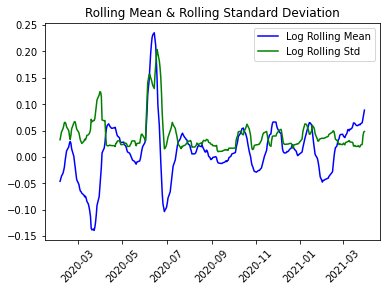

ADF Statistic: -4.646915336236475
p-value: 0.00010575359178707148
Critical Values:
	1%: -3.4512146067362317
	5%: -2.870730188960711
	10%: -2.5716664849383113
The time series is stationary


In [ ]:
stock_price_log = {}

for stock in stock_price.keys():
    print("Stock:", stock)
    stock_price_log[stock] = pd.DataFrame([])
    stock_price[stock]['log_Price'] = np.log(stock_price[stock]['Price'].astype('float'))
    #print(stock,len(stock_price[stock]['log_Price']))

    rolling_mean = stock_price[stock]['log_Price'].rolling(window = 12).mean()
    stock_price_log[stock]['log_Price'] = stock_price[stock]['log_Price']

    stock_price[stock]['log_Price_minus_mean'] = (stock_price[stock]['log_Price'] - rolling_mean).dropna()
    
    log_Price_minus_mean = stock_price[stock]['log_Price_minus_mean'].dropna()
    rolling_mean_log = stock_price[stock]['log_Price_minus_mean'].rolling(window = 12).mean()
    rolling_std_log = stock_price[stock]['log_Price_minus_mean'].rolling(window = 12).std()    
    plt.plot(rolling_mean_log, color = 'blue', label = 'Log Rolling Mean')
    plt.plot(rolling_std_log, color = 'green', label = 'Log Rolling Std')
    plt.legend(loc = 'best')
    plt.xticks(rotation = 45)
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.show()
    dickey_fuller = adfuller(log_Price_minus_mean)
    print('ADF Statistic: {}'.format(dickey_fuller[0]))
    print('p-value: {}'.format(dickey_fuller[1]))
    print('Critical Values:')
    for key, value in dickey_fuller[4].items():
        print('\t{}: {}'.format(key, value))
    if dickey_fuller[1] < 0.05:
        print('The time series is stationary')
    else:
        print('The time series is non-stationary')

We use log transformation ans subtract the time series by their means. The results of the Dickey-Fullar test show that now the time series are stationary and ready to use for model building.

In [ ]:
stock_price_log['Russia - Sberbank Rossii PAO (S']


,log_Price
Date,
2020-01-03,5.541264
2020-01-06,5.536940
2020-01-08,5.557407
2020-01-09,5.552921
2020-01-10,5.553696
...,...
2021-03-25,5.658297
2021-03-26,5.674079
2021-03-29,5.681196


Stock: Russia - Sberbank Rossii PAO (S


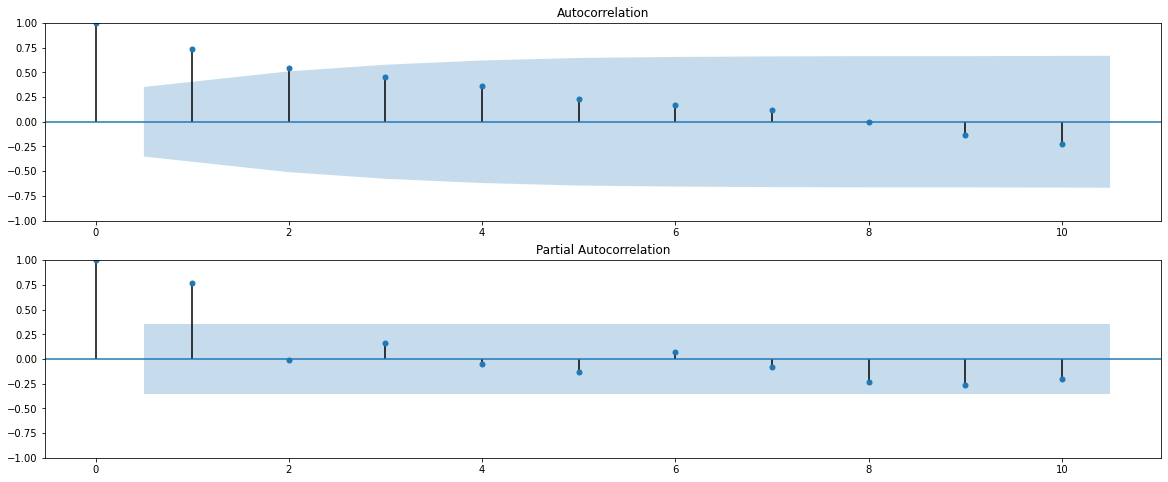

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1484.744, Time=2.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1484.549, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1482.553, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1482.554, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1486.432, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1480.669, Time=0.75 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.861 seconds
Stock: Turkey - Koc Holding AS (KCHOL)


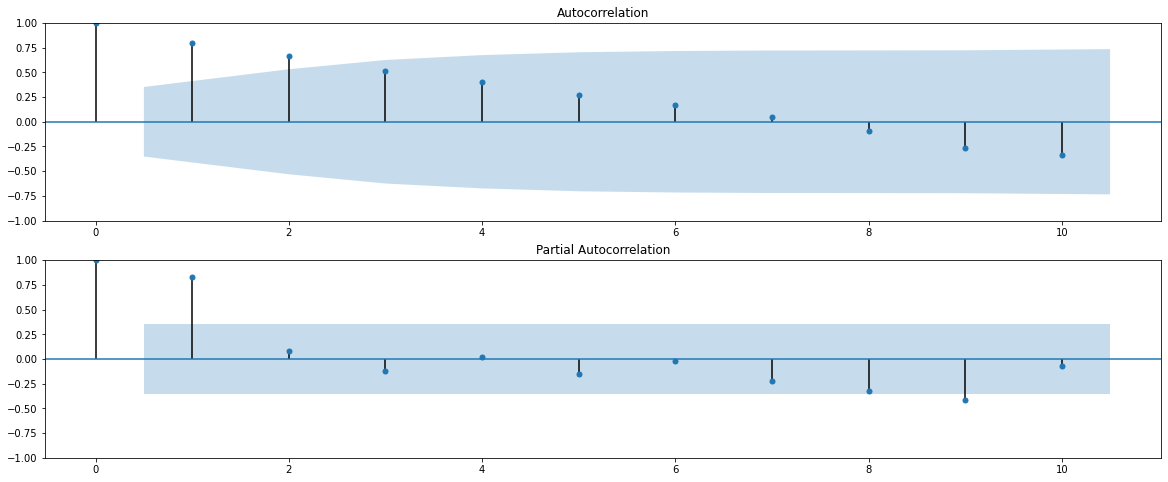

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1432.973, Time=1.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1438.650, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1437.246, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1437.236, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1440.637, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1435.691, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.844 seconds
Stock: Egypt - Medinet Nasr Housing (M


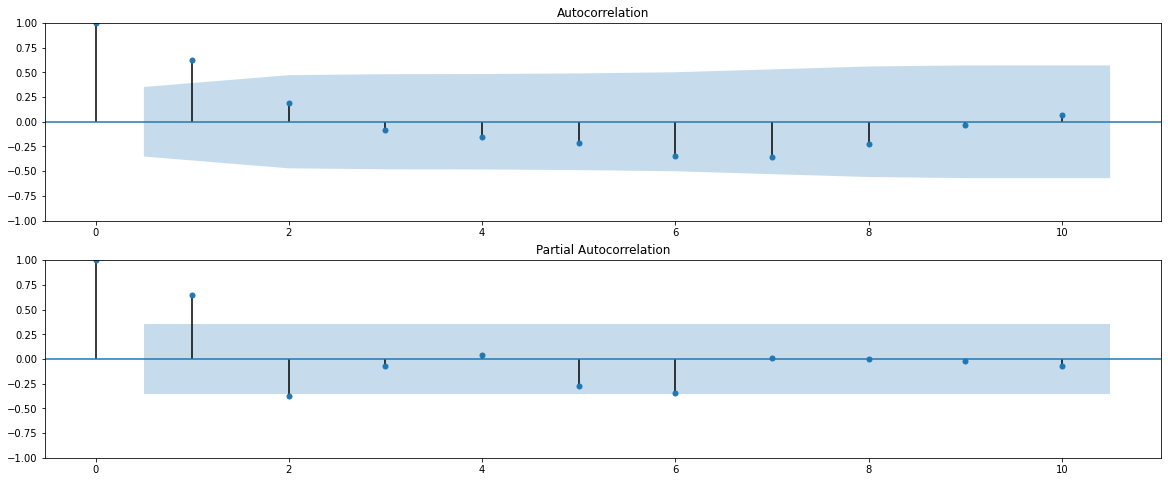

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1395.971, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1383.289, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1401.110, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1399.586, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1384.955, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1399.111, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1399.111, Time=0.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1397.116, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1402.838, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1400.867, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1400.867, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1401.320, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1398.873, Time=0.23 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 2.989 seconds
Stock: Br

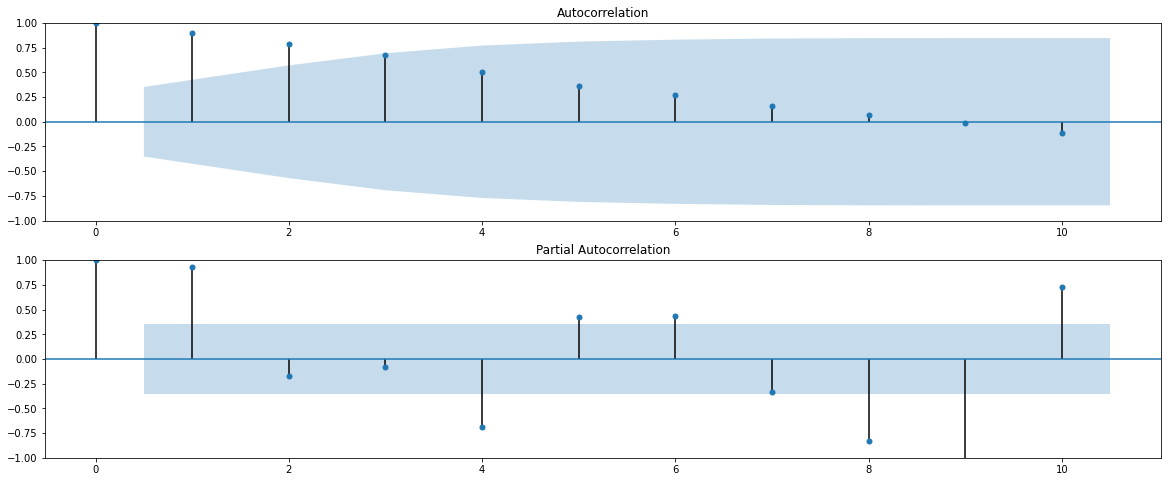

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1180.904, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1165.340, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1169.570, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1168.224, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1167.232, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1177.199, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1173.972, Time=0.69 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1179.764, Time=0.91 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1168.967, Time=0.50 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1177.698, Time=0.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1175.078, Time=0.12 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1178.679, Time=1.07 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1182.788, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0]  

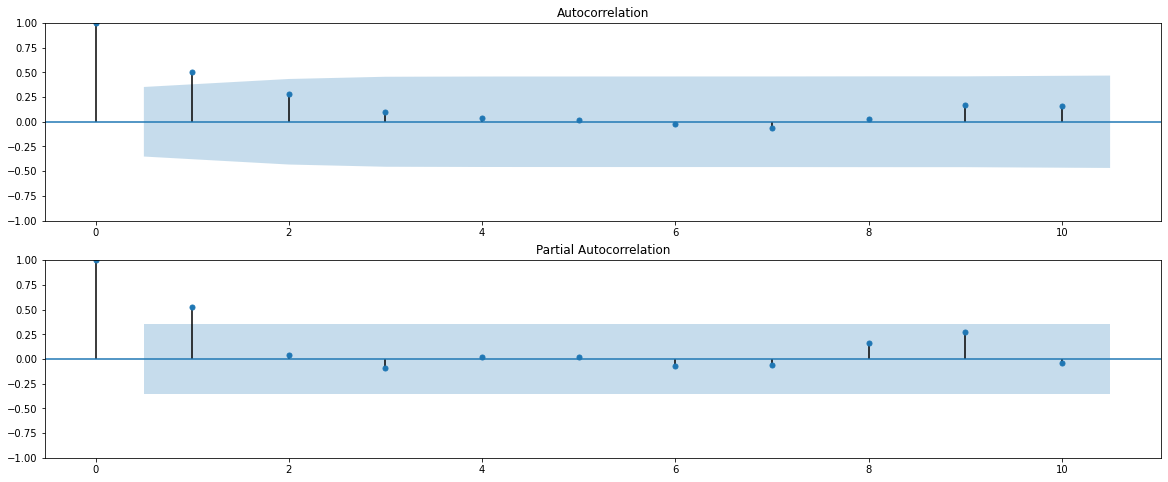

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1132.774, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1136.257, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1136.041, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1136.226, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1137.423, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1136.194, Time=0.62 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.857 seconds
Stock: Colombia - Cementos Argos SA (C


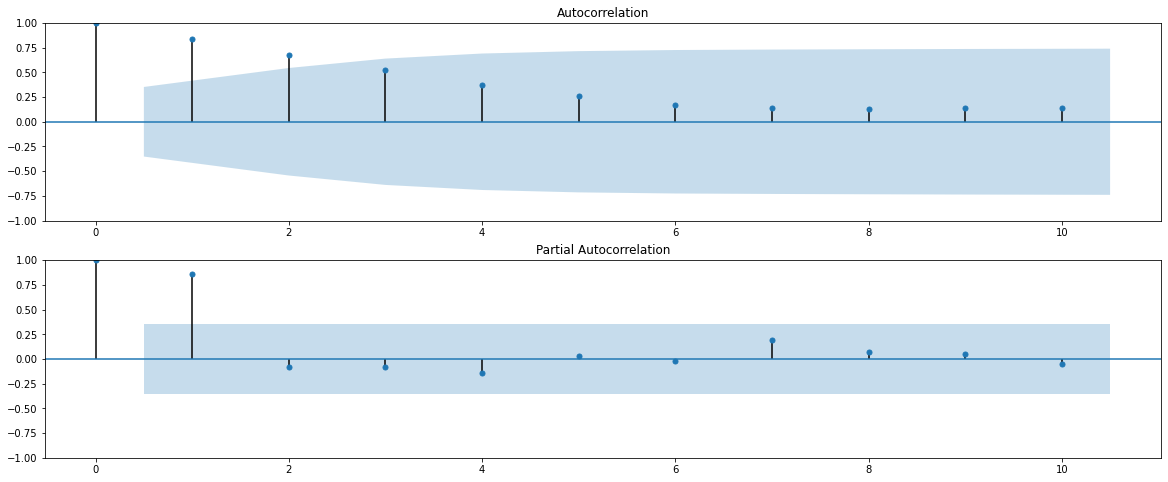

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1116.511, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1118.078, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1117.242, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1118.269, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1118.805, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1123.566, Time=0.62 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1122.558, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1118.998, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1119.698, Time=0.56 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1120.964, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1119.737, Time=0.87 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1125.398, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1120.648, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0]  

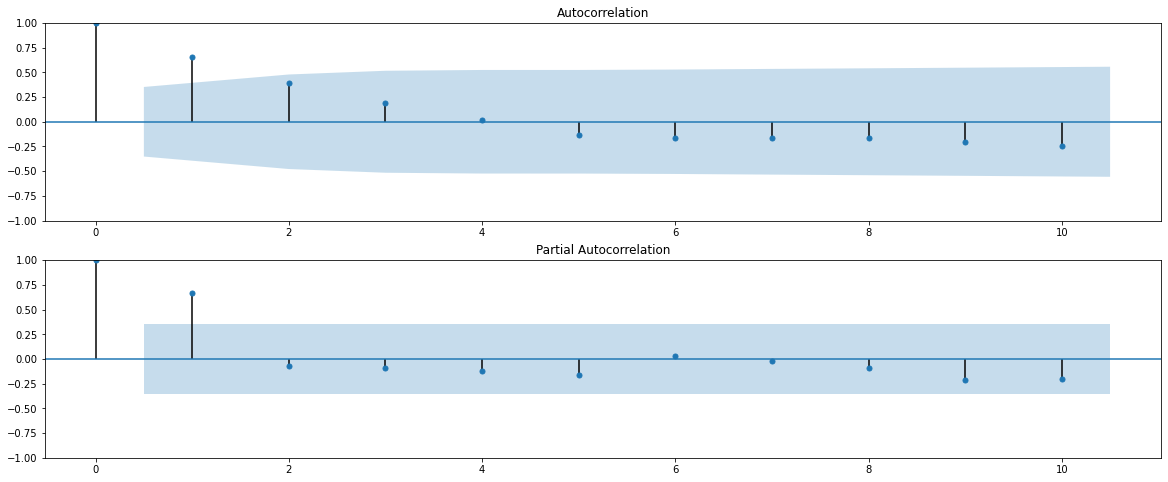

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-982.218, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-967.816, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-966.177, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-966.135, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-969.307, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-968.011, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-965.418, Time=0.65 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-984.039, Time=0.88 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-968.567, Time=0.58 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-985.897, Time=1.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-967.387, Time=1.10 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-983.563, Time=1.25 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-979.947, Time=1.19 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-980.659, Time=0.99 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept

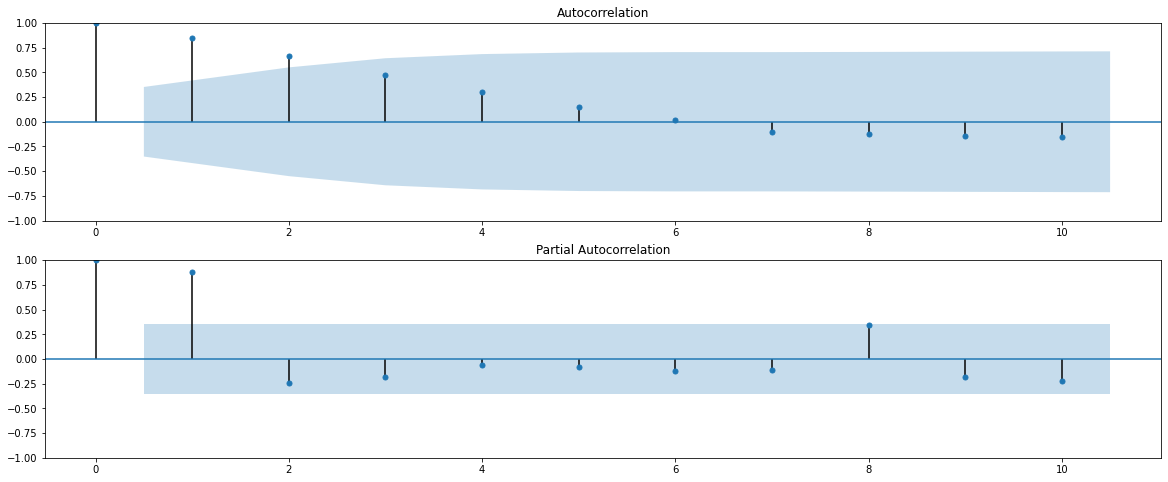

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1248.422, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1246.462, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1246.461, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1248.990, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1244.461, Time=0.46 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.831 seconds


In [ ]:
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
for stock in stock_price.keys():
    print('Stock:',stock)
    fig = plt.figure(figsize=(20,8))
    ax1 = fig.add_subplot(211)
    fig = plot_acf(stock_price_log[stock].iloc[:31], lags=10, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = plot_pacf(stock_price_log[stock].iloc[:31], lags=10, ax=ax2)
    plt.show()
    arima_param = auto_arima(stock_price_log[stock], trace = True)
    arima_param.summary()
    arima_param.summary().best

We can also teat the correlation between leads and lags with PACF and ACF. From the graphs above, we can see the the grpahs die down really quick and it means no autocorrelation is found

Stock: Russia - Sberbank Rossii PAO (S
Performing stepwise search to minimize aic


/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1484.744, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1484.549, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1482.553, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1482.554, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1486.432, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1480.669, Time=0.36 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.470 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


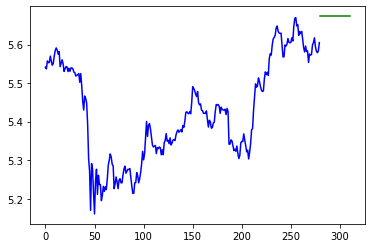

Stock: Turkey - Koc Holding AS (KCHOL)
Performing stepwise search to minimize aic


/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1432.973, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1438.650, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1437.246, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1437.236, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1440.637, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1435.691, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.542 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


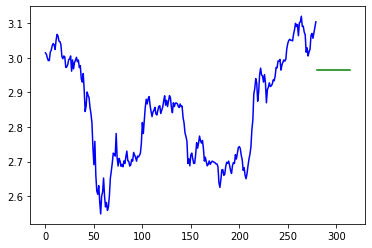

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Stock: Egypt - Medinet Nasr Housing (M
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1395.971, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1383.289, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1401.110, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1399.586, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1384.955, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1399.111, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1399.111, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1397.116, Time=0.40 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1402.838, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1400.867, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1400.867, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1401.320, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1398.873, Time=0.20 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


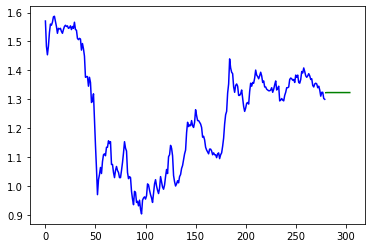

Stock: Brazil - Minerva SABrazil (BEEF
Performing stepwise search to minimize aic


/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1180.904, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1165.340, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1169.570, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1168.224, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1167.232, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1177.199, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1173.972, Time=0.68 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1179.764, Time=0.94 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1168.967, Time=0.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1177.698, Time=0.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1175.078, Time=0.11 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1178.679, Time=1.11 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1182.788, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1179.125, Time=0.19 sec
 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


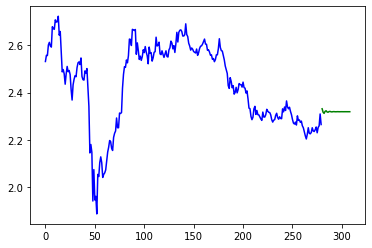

Stock: Argentina - Pampa Energia SA (P


/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1132.774, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1136.257, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1136.041, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1136.226, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1137.423, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1136.194, Time=0.66 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.890 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


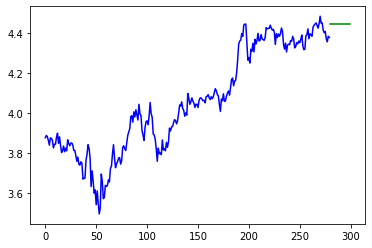

Stock: Colombia - Cementos Argos SA (C
Performing stepwise search to minimize aic


/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1116.511, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1118.078, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1117.242, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1118.269, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1118.805, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1123.566, Time=0.63 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1122.558, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1118.998, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1119.698, Time=0.56 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1120.964, Time=0.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1119.737, Time=0.84 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1125.398, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1120.648, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1124.411, Time=0.07 sec
 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


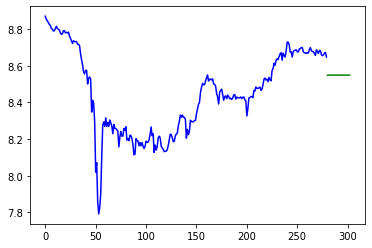

Stock: South Africa - Impala Platinum 
Performing stepwise search to minimize aic


/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-982.218, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-967.816, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-966.177, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-966.135, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-969.307, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-968.011, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-965.418, Time=0.62 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-984.039, Time=0.87 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-968.567, Time=1.13 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-985.897, Time=2.35 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-967.387, Time=1.08 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-983.563, Time=1.31 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-979.947, Time=1.51 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-980.659, Time=0.99 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-977.401, Time=1.16 sec
 ARIMA(5,1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


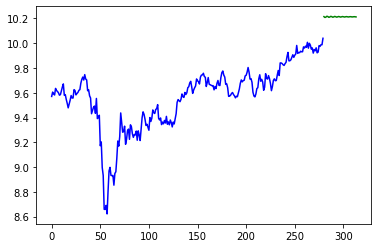

Stock: South Korea - Dongkuk Steel Mil
Performing stepwise search to minimize aic


/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1248.422, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1246.462, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1246.461, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1248.990, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1244.461, Time=0.97 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.464 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


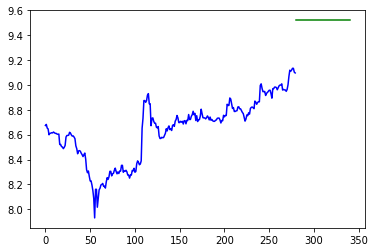

In [ ]:


train_size=280
for stock in stock_price.keys():
    print('Stock:',stock)

    train, test = train_test_split(stock_price_log[stock], train_size=train_size)

    # Fit your model
    model = auto_arima(stock_price_log[stock], seasonal=False, trace = True, m=12)

    # make your forecasts
    forecasts = model.predict(test.shape[0])  # predict N steps into the future

    # Visualize the forecasts (blue=train, green=forecasts)
    x = np.arange(stock_price_log[stock].shape[0])
    plt.plot(x[:train_size], train, c='blue')
    plt.plot(x[train_size:], forecasts, c='green')
    plt.show()

We can see that ARIMA model does not work for the stock price predictions if we use dynamic forecasting. It does not capture any patterns on the time series and can only predict single prices 

In [ ]:
stock_price_log['South Africa - Impala Platinum ']

#LSTM

We can also try LSTM model on time series prediction. Before that, we need to create a window for the train set and test set.

In [ ]:
import torch

In [ ]:
window_size = 5

stock_price_train_norm = {}
stock_price_test_norm = {}
stock_price_train = {}
stock_price_test = {}
scaler_list = {}


for stock in stock_price.keys():
    scaler = MinMaxScaler(feature_range=(-1, 1))
    train_data = stock_price[stock]['Price'][:-30]
    test_data = stock_price[stock]['Price'][-30-window_size:]
    stock_price_train[stock] = train_data
    stock_price_test[stock] = test_data
    #print(test_data)
    #train_data_normalized = scaler.fit_transform(train_data)
    train_data_normalized = scaler.fit_transform(np.array(train_data,dtype=float).reshape(-1, 1))
    train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)
    test_data_normalized =scaler.transform(np.array(test_data,dtype=float).reshape(-1, 1))
    test_data_normalized = torch.FloatTensor(test_data_normalized).view(-1)
    print(test_data_normalized)
    stock_price_train_norm[stock] = train_data_normalized
    stock_price_test_norm[stock] = test_data_normalized
    scaler_list[stock] = scaler

tensor([0.5837, 0.5629, 0.5854, 0.6858, 0.6701, 0.6701, 0.6025, 0.6777, 0.6633,
        0.7186, 0.6873, 0.6668, 0.6574, 0.7164, 0.8118, 0.7929, 0.7366, 0.7841,
        0.9274, 0.8661, 0.9310, 0.9125, 1.0475, 1.0404, 0.8852, 0.8144, 0.9219,
        0.9768, 0.8723, 0.9274, 0.9424, 1.0213, 1.0572, 1.0563, 1.0178])
tensor([0.9960, 1.0000, 0.9717, 0.9273, 0.8507, 0.9435, 0.9556, 1.0888, 0.9556,
        0.8910, 0.9798, 0.7740, 1.0646, 1.0565, 1.0565, 1.0404, 1.0767, 0.9717,
        1.1130, 1.1493, 1.1332, 1.1171, 1.1171, 1.1574, 1.2785, 1.2180, 1.0484,
        0.5883, 0.5277, 0.5197, 0.4591, 0.3037, 0.2735, 0.3542, 0.3360])
tensor([ 0.1653,  0.1570,  0.1157,  0.1322,  0.0909,  0.0248,  0.0661,  0.0661,
         0.0000, -0.0083,  0.0496,  0.1488,  0.2397,  0.1901,  0.0992,  0.1074,
         0.1157,  0.1240,  0.1322,  0.0744,  0.0579,  0.0909,  0.0579,  0.0909,
         0.0992,  0.0826,  0.0165, -0.0413, -0.0744, -0.0165,  0.0248,  0.0248,
         0.0165,  0.0413,  0.0579])
tensor([-0.3202, -

We then create sequences for each period.

In [ ]:


def create_sequence(dataset, window_size = window_size):
    
    sequence = []
    data_len = len(dataset)

    for i in range(data_len-window_size):

        seq = dataset[i:i+window_size]
        label = dataset[i+window_size:i+window_size+1]
        sequence.append((seq,label))
    #print(sequence)
    return sequence

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1, batch_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.batch_size = batch_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first= True)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(self.batch_size,1,self.hidden_layer_size),
                            torch.zeros(self.batch_size,1,self.hidden_layer_size))

    def forward(self, input_seq):

        lstm_out, self.hidden_cell = self.lstm(input_seq.view(self.batch_size, len(input_seq), -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]


def save_model(model,name):
    PATH = '/content/best_model_'+ name +'.pt'
    torch.save({
            'model_state_dict': model.state_dict()
            }, PATH)

In [ ]:
stock_price_test_norm['South Africa - Impala Platinum ']

tensor([0.9562, 0.9090, 0.9113, 1.0000, 0.9659, 0.9632, 1.0257, 1.0920, 1.1564,
        1.0441, 1.0298, 1.2200, 1.1463, 1.2602, 1.4217, 1.3753, 1.3908, 1.4451,
        1.5149, 1.5837, 1.6566, 1.5799, 1.4834, 1.4918, 1.5160, 1.3590, 1.3815,
        1.3167, 1.2539, 1.2923, 1.3667, 1.4758, 1.4136, 1.4043, 1.4578])

In [ ]:
def train(dataset, name, epochs):

    model_LSTM = LSTM()
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model_LSTM.parameters(), lr=0.0005)
    epochs = epochs

    train_sequence = create_sequence(dataset)
    highest_loss = 10000

    for i in range(epochs):
        total_loss = 0
        for seq, labels in train_sequence:
            optimizer.zero_grad()
            model_LSTM.hidden_cell = (torch.zeros(1, 1, model_LSTM.hidden_layer_size),
                            torch.zeros(1, 1, model_LSTM.hidden_layer_size))

            y_pred= model_LSTM(seq)
            #print(y_pred)
            single_loss = loss_function(y_pred, labels)
            single_loss.backward()
            optimizer.step()
            total_loss += single_loss

        if total_loss < highest_loss:
            save_model(model_LSTM, name) #Save the best model
            highest_loss = total_loss
        if i%5 == 0:
            print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    

    print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

    return model_LSTM

In [ ]:
LSTM_models ={}
for stock_norm in stock_price_train_norm.keys():
    print('Stock: ', stock_norm)
    LSTM_models[stock_norm] = train(stock_price_test_norm[stock_norm], stock_norm, 200)
    print('-----------------------------------')

    

Stock:  Russia - Sberbank Rossii PAO (S
epoch:   0 loss: 0.16998932
epoch:   5 loss: 0.00059836
epoch:  10 loss: 0.00003123
epoch:  15 loss: 0.00012141
epoch:  20 loss: 0.00028453
epoch:  25 loss: 0.00009898
epoch:  30 loss: 0.00000302
epoch:  35 loss: 0.00000593
epoch:  40 loss: 0.00001715
epoch:  45 loss: 0.00002294
epoch:  50 loss: 0.00002480
epoch:  55 loss: 0.00002455
epoch:  60 loss: 0.00002321
epoch:  65 loss: 0.00002133
epoch:  70 loss: 0.00001920
epoch:  75 loss: 0.00001699
epoch:  80 loss: 0.00001482
epoch:  85 loss: 0.00001273
epoch:  90 loss: 0.00001077
epoch:  95 loss: 0.00000897
epoch: 100 loss: 0.00000734
epoch: 105 loss: 0.00000588
epoch: 110 loss: 0.00000461
epoch: 115 loss: 0.00000352
epoch: 120 loss: 0.00000260
epoch: 125 loss: 0.00000184
epoch: 130 loss: 0.00000124
epoch: 135 loss: 0.00000078
epoch: 140 loss: 0.00000045
epoch: 145 loss: 0.00000022
epoch: 150 loss: 0.00000009
epoch: 155 loss: 0.00000002
epoch: 160 loss: 0.00000000
epoch: 165 loss: 0.00000001
epoch: 1

In [ ]:




def predict_outcome(dataset, model, name):
    checkpoint = torch.load('/content/best_model_'+ name +'.pt')
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()

    pred = []
    labels = []
    
    for seq, label in dataset:
        with torch.no_grad():
            model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                            torch.zeros(1, 1, model.hidden_layer_size))
        #print(seq)
        y_pred  = model(seq)
        #print(y_pred)
        pred.append(y_pred.detach().cpu().numpy())
        labels.append(label)
    predictions = scaler_list[name].inverse_transform(pred).reshape(-1, 1)
    return predictions, pred






In [ ]:
stock_prediction_LSTM = {}
for stock_norm in stock_price_train_norm.keys():
    test_sequence = create_sequence(stock_price_test_norm[stock_norm])
    prediction_LSTM, pred_raw = predict_outcome(test_sequence, LSTM_models[stock_norm], stock_norm) 
    stock_prediction_LSTM[stock_norm] = prediction_LSTM

In [ ]:
stock_prediction_LSTM['South Africa - Impala Platinum ']

array([[24388.39902592],
       [24408.21761751],
       [24663.52646399],
       [25057.73162973],
       [25507.37677574],
       [25337.0675019 ],
       [25162.78583038],
       [25747.70948184],
       [25787.86001778],
       [26243.3563267 ],
       [26998.00815785],
       [27024.74272239],
       [27021.81184864],
       [27030.24671066],
       [27226.81000853],
       [27541.31742418],
       [27760.75085175],
       [27411.0126189 ],
       [26894.65595973],
       [26789.78169715],
       [26917.52185559],
       [26518.8182379 ],
       [26520.0322907 ],
       [26332.17905426],
       [26129.75083351],
       [26294.87153995],
       [26624.42707121],
       [27189.13838422],
       [27110.01220214],
       [26903.72907269]])

In [ ]:
test_sequence

[(tensor([0.9562, 0.9090, 0.9113, 1.0000, 0.9659]), tensor([0.9632])),
 (tensor([0.9090, 0.9113, 1.0000, 0.9659, 0.9632]), tensor([1.0257])),
 (tensor([0.9113, 1.0000, 0.9659, 0.9632, 1.0257]), tensor([1.0920])),
 (tensor([1.0000, 0.9659, 0.9632, 1.0257, 1.0920]), tensor([1.1564])),
 (tensor([0.9659, 0.9632, 1.0257, 1.0920, 1.1564]), tensor([1.0441])),
 (tensor([0.9632, 1.0257, 1.0920, 1.1564, 1.0441]), tensor([1.0298])),
 (tensor([1.0257, 1.0920, 1.1564, 1.0441, 1.0298]), tensor([1.2200])),
 (tensor([1.0920, 1.1564, 1.0441, 1.0298, 1.2200]), tensor([1.1463])),
 (tensor([1.1564, 1.0441, 1.0298, 1.2200, 1.1463]), tensor([1.2602])),
 (tensor([1.0441, 1.0298, 1.2200, 1.1463, 1.2602]), tensor([1.4217])),
 (tensor([1.0298, 1.2200, 1.1463, 1.2602, 1.4217]), tensor([1.3753])),
 (tensor([1.2200, 1.1463, 1.2602, 1.4217, 1.3753]), tensor([1.3908])),
 (tensor([1.1463, 1.2602, 1.4217, 1.3753, 1.3908]), tensor([1.4451])),
 (tensor([1.2602, 1.4217, 1.3753, 1.3908, 1.4451]), tensor([1.5149])),
 (tens

In [ ]:
prediction_LSTM

array([[23493.59765971],
       [23352.78235376],
       [23724.56088424],
       [24276.59714735],
       [24809.46682978],
       [24636.11766088],
       [24070.23145807],
       [24967.45881295],
       [25385.01570737],
       [25509.62917709],
       [26566.82465863],
       [27208.10385764],
       [27019.66000092],
       [27304.25112343],
       [27823.41164124],
       [28234.786075  ],
       [28639.98228192],
       [28817.67960155],
       [28253.52715504],
       [27829.56128967],
       [28055.77414894],
       [27787.27160752],
       [26992.14958572],
       [26994.02411711],
       [26501.63203454],
       [26271.71245086],
       [26746.78708112],
       [27341.69200361],
       [27620.11971772],
       [27295.05205381]])

Date
2021-02-10     265.9
2021-02-11     264.7
2021-02-12     266.0
2021-02-15    271.81
2021-02-16     270.9
2021-02-17     270.9
2021-02-18    266.99
2021-02-19    271.34
2021-02-20    270.51
2021-02-22    273.71
2021-02-24     271.9
2021-02-25    270.71
2021-02-26    270.17
2021-03-01    273.58
2021-03-02     279.1
2021-03-03    278.01
2021-03-04    274.75
2021-03-05     277.5
2021-03-09    285.79
2021-03-10    282.24
2021-03-11     286.0
2021-03-12    284.93
2021-03-15    292.74
2021-03-16    292.33
2021-03-17    283.35
2021-03-18    279.25
2021-03-19    285.47
2021-03-22    288.65
2021-03-23     282.6
2021-03-24    285.79
2021-03-25    286.66
2021-03-26    291.22
2021-03-29     293.3
2021-03-30    293.25
2021-03-31    291.02
Name: Price, dtype: object
Prediction difference: -1325.0106224083884
Date
2021-02-11    22.68
2021-02-12     22.7
2021-02-15    22.56
2021-02-16    22.34
2021-02-17    21.96
2021-02-18    22.42
2021-02-19    22.48
2021-02-22    23.14
2021-02-23    22.48
2021-

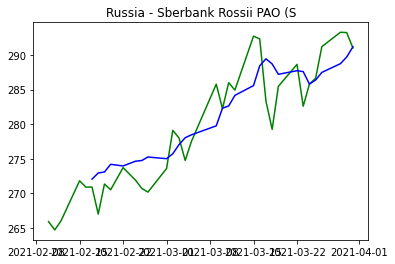

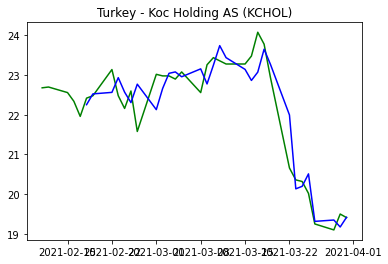

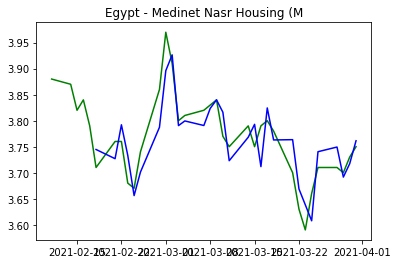

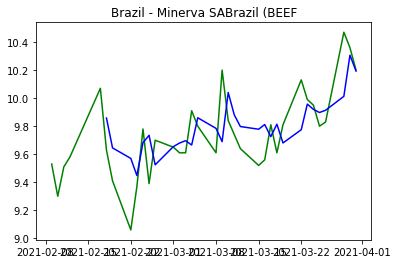

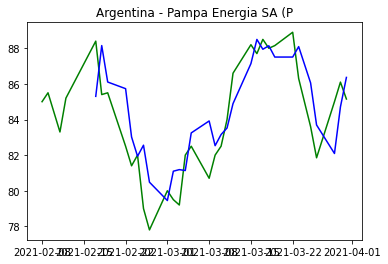

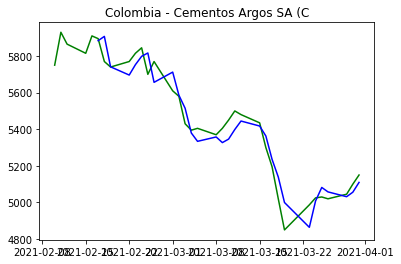

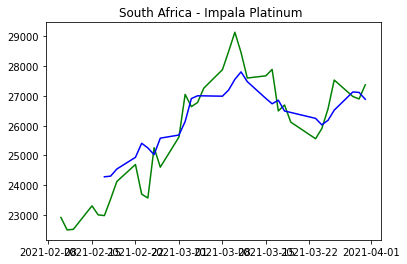

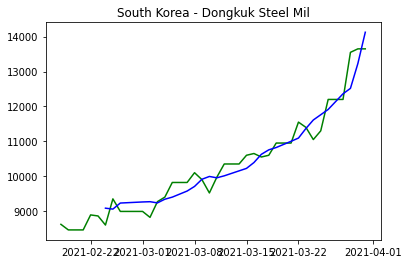

<Figure size 432x288 with 0 Axes>

In [ ]:
stock_price_predictions = {}
for stock_name in stock_price_test.keys():
    print(stock_price_test[stock_name])
    stock_price_pred = pd.DataFrame(stock_prediction_LSTM[stock_name], columns=['Predicted Price'], index = stock_price_test[stock_name][-30:].index)
    stock_price_predictions[stock_name] =stock_price_pred
    difference = stock_price_pred['Predicted Price'].sum() - stock_price_test[stock_name].sum()
    print('Prediction difference:', difference)
    plt.plot(stock_price_test[stock_name], color = 'green', label = 'Real price')
    plt.plot(stock_price_pred, color = 'blue', label = 'prediction')
    plt.title(stock_name)
    plt.figure() 

We can see that from the graph above, the models can capture the trend of the time sequence

In [ ]:
stock_price_train['South Africa - Impala Platinum ']

Date
2020-01-02    14330.0
2020-01-03    14843.0
2020-01-06    14620.0
2020-01-07    14500.0
2020-01-08    15290.0
2020-01-09    15031.0
2020-01-10    14914.0
2020-01-13    14752.0
2020-01-14    14477.0
2020-01-15    14542.0
2020-01-16    14994.0
2020-01-17    15461.0
2020-01-20    15857.0
2020-01-21    14463.0
2020-01-22    14543.0
2020-01-23    13992.0
2020-01-24    13550.0
2020-01-27    13068.0
2020-01-28    13464.0
2020-01-29    13903.0
2020-01-30    14434.0
2020-01-31    14150.0
2020-02-03    14150.0
2020-02-04    15137.0
2020-02-05    15025.0
2020-02-06    14511.0
2020-02-07    14675.0
2020-02-10    14800.0
2020-02-11    15055.0
2020-02-12    15135.0
2020-02-13    15943.0
2020-02-14    16455.0
2020-02-17    16757.0
2020-02-18    16361.0
2020-02-19    17090.0
2020-02-20    16500.0
2020-02-21    16373.0
2020-02-24    15008.0
2020-02-25    15120.0
2020-02-26    14400.0
2020-02-27    14149.0
2020-02-28    12465.0
2020-03-02    12780.0
2020-03-03    13123.0
2020-03-04    13257.0
2020-

Once we get the prediction, we can develop a strategy for each stock. Since the results generated from LSTM are better than from ARIMA. We use the prediction results to build our strategies. We need to set the loss threshold, our max number of share holding and the max win percentage for each trade to optimize the profits.

In [ ]:

def trading_strategy(prediction, real_price, loss_threshold, win_percentage, initial_money, max_holding):
    initial_money = initial_money
    total_profit = 0
    realized_profit = 0
    loss_threshold = loss_threshold
    win_percentage = win_percentage
    cash = initial_money
    max_holding = max_holding
    holding =[]

    for i in range(len(real_price)-1):
        print("Trading day:", i +1)
        print('Current Price:', real_price.iloc[i])

        if prediction[i+1][0] > real_price.iloc[i]:

            if (prediction[i][0]>=prediction[i+1][0]) | ((cash + len(holding)*real_price.iloc[i]) >= initial_money*(1 - loss_threshold)):
                if (len(holding) <= max_holding) & (cash > real_price.iloc[i]):
                    holding.append(real_price.iloc[i])
                    cash = cash - real_price.iloc[i]
        elif (prediction[i+1][0] < real_price.iloc[i]) & (len(holding) >=1):
            selling_list = []
            for j in range(len(holding)):
                
                if  holding[j]*(1 + win_percentage)< real_price.iloc[i]:
                    selling_list.append(holding[j])
            print('Selling list:', selling_list)
            holding = [x for x in holding if (x not in selling_list)]
            cash += len(selling_list)*real_price.iloc[i]
               


        total_profit = real_price.iloc[i]*len(holding) + cash - initial_money
        print('Current holding entry price:', holding)

        print('Cash:', cash)
        print('Unrealized profit:', (sum(holding) - len(holding)*real_price.iloc[i]))

        print('Profit:', total_profit)
        print("-------------------------------------------------------------") 
    return total_profit




In [ ]:
stock_price_predictions.keys()

dict_keys(['Russia - Sberbank Rossii PAO (S', 'Turkey - Koc Holding AS (KCHOL)', 'Egypt - Medinet Nasr Housing (M', 'Brazil - Minerva SABrazil (BEEF', 'Argentina - Pampa Energia SA (P', 'Colombia - Cementos Argos SA (C', 'South Africa - Impala Platinum ', 'South Korea - Dongkuk Steel Mil'])

Russia - Sberbank Rossii PAO (S

In [ ]:
profit = trading_strategy(stock_price_predictions['Russia - Sberbank Rossii PAO (S'][-30:].values.tolist(), stock_price_test['Russia - Sberbank Rossii PAO (S'][-30:], 0.3, 0.1, 4000,10)

Trading day: 1
Current Price: 270.9
Current holding entry price: [270.9]
Cash: 3729.1
Unrealized profit: 0.0
Profit: 0.0
-------------------------------------------------------------
Trading day: 2
Current Price: 266.99
Current holding entry price: [270.9, 266.99]
Cash: 3462.1099999999997
Unrealized profit: 3.909999999999968
Profit: -3.9100000000003092
-------------------------------------------------------------
Trading day: 3
Current Price: 271.34
Current holding entry price: [270.9, 266.99, 271.34]
Cash: 3190.7699999999995
Unrealized profit: -4.789999999999964
Profit: 4.789999999999509
-------------------------------------------------------------
Trading day: 4
Current Price: 270.51
Current holding entry price: [270.9, 266.99, 271.34, 270.51]
Cash: 2920.2599999999993
Unrealized profit: -2.2999999999999545
Profit: 2.2999999999992724
-------------------------------------------------------------
Trading day: 5
Current Price: 273.71
Current holding entry price: [270.9, 266.99, 271.34, 2

Turkey - Koc Holding AS (KCHOL)

In [ ]:
profit = trading_strategy(stock_price_predictions['Turkey - Koc Holding AS (KCHOL)'][-30:].values.tolist(), stock_price_test['Turkey - Koc Holding AS (KCHOL)'][-30:], 0.5, 0.05, 1000,5)

Trading day: 1
Current Price: 22.42
Current holding entry price: [22.42]
Cash: 977.58
Unrealized profit: 0.0
Profit: 0.0
-------------------------------------------------------------
Trading day: 2
Current Price: 22.48
Current holding entry price: [22.42, 22.48]
Cash: 955.1
Unrealized profit: -0.05999999999999517
Profit: 0.06000000000005912
-------------------------------------------------------------
Trading day: 3
Current Price: 23.14
Selling list: []
Current holding entry price: [22.42, 22.48]
Cash: 955.1
Unrealized profit: -1.3799999999999955
Profit: 1.3799999999999955
-------------------------------------------------------------
Trading day: 4
Current Price: 22.48
Current holding entry price: [22.42, 22.48, 22.48]
Cash: 932.62
Unrealized profit: -0.05999999999998806
Profit: 0.05999999999994543
-------------------------------------------------------------
Trading day: 5
Current Price: 22.16
Current holding entry price: [22.42, 22.48, 22.48, 22.16]
Cash: 910.46
Unrealized profit: 0.

Brazil - Minerva SABrazil (BEEF

In [ ]:
profit = trading_strategy(stock_price_predictions['Brazil - Minerva SABrazil (BEEF'][-30:].values.tolist(), stock_price_test['Brazil - Minerva SABrazil (BEEF'][-30:], 0.5, 0.03, 200,10)

Trading day: 1
Current Price: 9.63
Current holding entry price: [9.63]
Cash: 190.37
Unrealized profit: 0.0
Profit: 0.0
-------------------------------------------------------------
Trading day: 2
Current Price: 9.41
Current holding entry price: [9.63, 9.41]
Cash: 180.96
Unrealized profit: 0.21999999999999886
Profit: -0.21999999999999886
-------------------------------------------------------------
Trading day: 3
Current Price: 9.06
Current holding entry price: [9.63, 9.41, 9.06]
Cash: 171.9
Unrealized profit: 0.9200000000000017
Profit: -0.9199999999999875
-------------------------------------------------------------
Trading day: 4
Current Price: 9.37
Current holding entry price: [9.63, 9.41, 9.06, 9.37]
Cash: 162.53
Unrealized profit: -0.00999999999999801
Profit: 0.009999999999990905
-------------------------------------------------------------
Trading day: 5
Current Price: 9.78
Selling list: [9.41, 9.06, 9.37]
Current holding entry price: [9.63]
Cash: 191.87
Unrealized profit: -0.1499

Egypt - Medinet Nasr Housing (M

In [ ]:
profit = trading_strategy(stock_price_predictions['Egypt - Medinet Nasr Housing (M'][-30:].values.tolist(), stock_price_test['Egypt - Medinet Nasr Housing (M'][-30:], 0.5, 0.04, 50,5)

Trading day: 1
Current Price: 3.71
Current holding entry price: [3.71]
Cash: 46.29
Unrealized profit: 0.0
Profit: 0.0
-------------------------------------------------------------
Trading day: 2
Current Price: 3.76
Current holding entry price: [3.71, 3.76]
Cash: 42.53
Unrealized profit: -0.04999999999999982
Profit: 0.04999999999999716
-------------------------------------------------------------
Trading day: 3
Current Price: 3.76
Selling list: []
Current holding entry price: [3.71, 3.76]
Cash: 42.53
Unrealized profit: -0.04999999999999982
Profit: 0.04999999999999716
-------------------------------------------------------------
Trading day: 4
Current Price: 3.68
Selling list: []
Current holding entry price: [3.71, 3.76]
Cash: 42.53
Unrealized profit: 0.10999999999999943
Profit: -0.10999999999999943
-------------------------------------------------------------
Trading day: 5
Current Price: 3.67
Current holding entry price: [3.71, 3.76, 3.67]
Cash: 38.86
Unrealized profit: 0.1300000000000

Colombia - Cementos Argos SA (C

In [ ]:
profit = trading_strategy(stock_price_predictions['Colombia - Cementos Argos SA (C'][-30:].values.tolist(), stock_price_test['Colombia - Cementos Argos SA (C'][-30:], 0.1, 0.15, 40000,15)

Trading day: 1
Current Price: 5895.0
Current holding entry price: [5895.0]
Cash: 34105.0
Unrealized profit: 0.0
Profit: 0.0
-------------------------------------------------------------
Trading day: 2
Current Price: 5770.0
Selling list: []
Current holding entry price: [5895.0]
Cash: 34105.0
Unrealized profit: 125.0
Profit: -125.0
-------------------------------------------------------------
Trading day: 3
Current Price: 5740.0
Selling list: []
Current holding entry price: [5895.0]
Cash: 34105.0
Unrealized profit: 155.0
Profit: -155.0
-------------------------------------------------------------
Trading day: 4
Current Price: 5770.0
Selling list: []
Current holding entry price: [5895.0]
Cash: 34105.0
Unrealized profit: 125.0
Profit: -125.0
-------------------------------------------------------------
Trading day: 5
Current Price: 5815.0
Selling list: []
Current holding entry price: [5895.0]
Cash: 34105.0
Unrealized profit: 80.0
Profit: -80.0
----------------------------------------------

Turkey - Koc Holding AS (KCHOL)

In [ ]:
profit = trading_strategy(stock_price_predictions['South Korea - Dongkuk Steel Mil'][-30:].values.tolist(), stock_price_test['South Korea - Dongkuk Steel Mil'][-30:], 0.5, 0.1, 2000,10)

Trading day: 1
Current Price: 22.42
Current holding entry price: [22.42]
Cash: 1977.58
Unrealized profit: 0.0
Profit: 0.0
-------------------------------------------------------------
Trading day: 2
Current Price: 22.48
Current holding entry price: [22.42, 22.48]
Cash: 1955.1
Unrealized profit: -0.05999999999999517
Profit: 0.05999999999994543
-------------------------------------------------------------
Trading day: 3
Current Price: 23.14
Selling list: []
Current holding entry price: [22.42, 22.48]
Cash: 1955.1
Unrealized profit: -1.3799999999999955
Profit: 1.3799999999998818
-------------------------------------------------------------
Trading day: 4
Current Price: 22.48
Current holding entry price: [22.42, 22.48, 22.48]
Cash: 1932.62
Unrealized profit: -0.05999999999998806
Profit: 0.05999999999994543
-------------------------------------------------------------
Trading day: 5
Current Price: 22.16
Current holding entry price: [22.42, 22.48, 22.48, 22.16]
Cash: 1910.4599999999998
Unrea

Argentina - Pampa Energia SA (P

In [ ]:
profit = trading_strategy(stock_price_predictions['South Africa - Impala Platinum '][-30:].values.tolist(), stock_price_test['Argentina - Pampa Energia SA (P'][-30:], 0.5, 0.1, 2000,10)

Trading day: 1
Current Price: 88.4
Current holding entry price: [88.4]
Cash: 1911.6
Unrealized profit: 0.0
Profit: 0.0
-------------------------------------------------------------
Trading day: 2
Current Price: 85.4
Current holding entry price: [88.4, 85.4]
Cash: 1826.1999999999998
Unrealized profit: 3.0
Profit: -3.0000000000002274
-------------------------------------------------------------
Trading day: 3
Current Price: 85.5
Current holding entry price: [88.4, 85.4, 85.5]
Cash: 1740.6999999999998
Unrealized profit: 2.8000000000000114
Profit: -2.800000000000182
-------------------------------------------------------------
Trading day: 4
Current Price: 82.5
Current holding entry price: [88.4, 85.4, 85.5, 82.5]
Cash: 1658.1999999999998
Unrealized profit: 11.800000000000011
Profit: -11.800000000000182
-------------------------------------------------------------
Trading day: 5
Current Price: 81.4
Current holding entry price: [88.4, 85.4, 85.5, 82.5, 81.4]
Cash: 1576.7999999999997
Unreali

South Africa - Impala Platinum

In [ ]:
profit = trading_strategy(stock_price_predictions['South Africa - Impala Platinum '][-30:].values.tolist(), stock_price_test['South Africa - Impala Platinum '][-30:], 0.5, 0.1, 200000,10)

Trading day: 1
Current Price: 22981.0
Current holding entry price: [22981.0]
Cash: 177019.0
Unrealized profit: 0.0
Profit: 0.0
-------------------------------------------------------------
Trading day: 2
Current Price: 23536.0
Current holding entry price: [22981.0, 23536.0]
Cash: 153483.0
Unrealized profit: -555.0
Profit: 555.0
-------------------------------------------------------------
Trading day: 3
Current Price: 24125.0
Current holding entry price: [22981.0, 23536.0, 24125.0]
Cash: 129358.0
Unrealized profit: -1733.0
Profit: 1733.0
-------------------------------------------------------------
Trading day: 4
Current Price: 24697.0
Current holding entry price: [22981.0, 23536.0, 24125.0, 24697.0]
Cash: 104661.0
Unrealized profit: -3449.0
Profit: 3449.0
-------------------------------------------------------------
Trading day: 5
Current Price: 23700.0
Current holding entry price: [22981.0, 23536.0, 24125.0, 24697.0, 23700.0]
Cash: 80961.0
Unrealized profit: 539.0
Profit: -539.0
----

After we test out our strategy on different stocks, we can find out that our strategy can generate more than 10% of return in 3 months of time for most of stocks. However, since the size of data is not sufficient. it does not tell whether the strategy is good for long term.